<a href="https://colab.research.google.com/github/shivamsouravjha/Auto_encoder/blob/master/autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import backend as K
from keras.datasets import mnist
import numpy as np
from keras.callbacks import TensorBoard
import matplotlib.pyplot as plt
from keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D

input_img = Input(shape=(28,28,1))
#encoding
x1 = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
m1= MaxPooling2D((2, 2), padding='same')(x1)

 
x2 = Conv2D(8, (3, 3), activation='relu', padding='same')(m1)
encoded = MaxPooling2D((2, 2), padding='same')(x2)




y5 = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
y6 = UpSampling2D((2, 2))(y5)

y7= Add()([x2, y6])

y8 = Conv2D(16, (3, 3), activation='relu', padding='same')(y7)
y9 = UpSampling2D((2, 2))(y8)

y4= Add()([x1, y9])

decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(y4)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format

autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

decoded_imgs = autoencoder.predict(x_test)



Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 0.6688 - val_loss: 0.6659
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.6597 - val_loss: 0.6556
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.6479 - val_loss: 0.6426
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.6337 - val_loss: 0.6273
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.6170 - val_loss: 0.6096
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.5981 - val_loss: 0.5898
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.5771 - val_loss: 0.5680
Epoch 8/50
469/469 [==============================] - 2s 4ms/step - loss: 0.5543 - val_loss: 0.5442
Epoch 9/50
469/469 [==============================] - 2s 4ms/step - loss: 0.5292 - val_loss: 0.5177
Epoch 10/50
469/469 [==============================] - 2s 4ms/step - loss: 0.5007 - val_loss: 0.4869

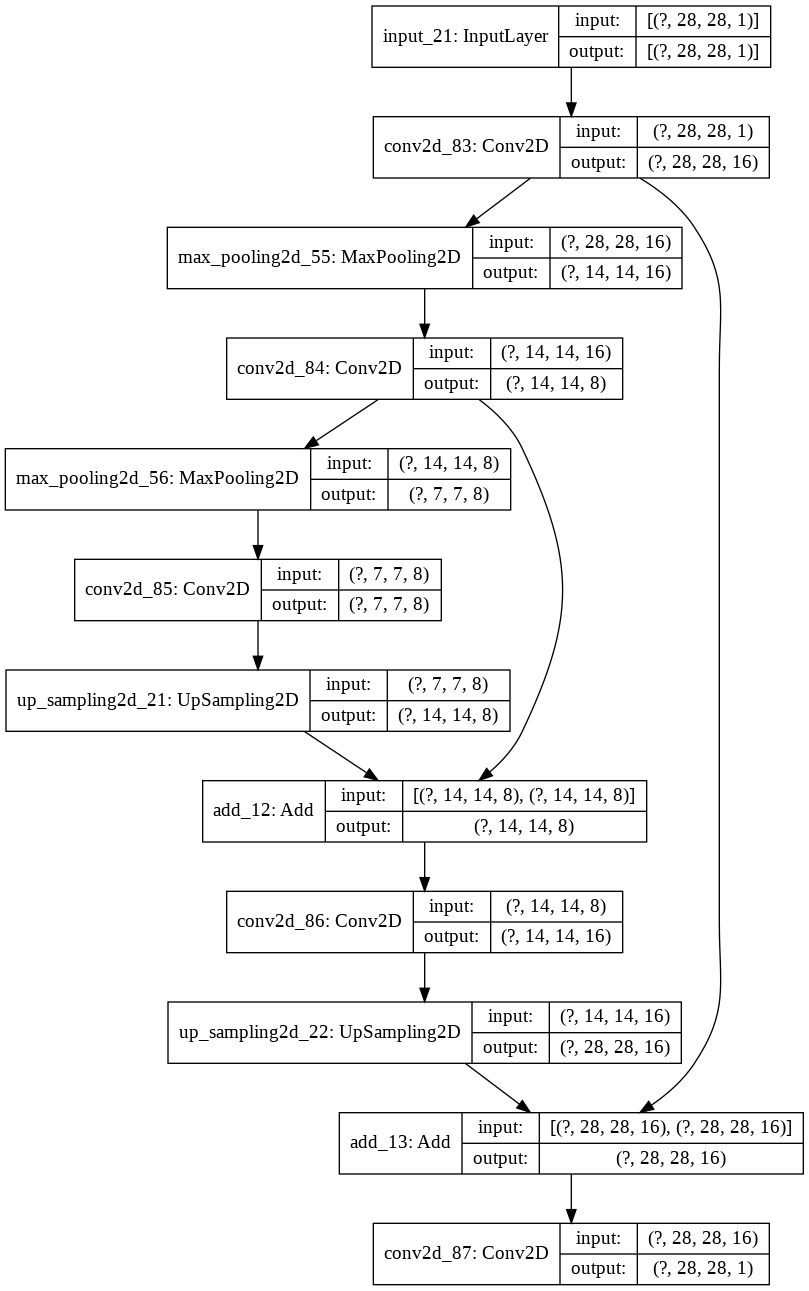

In [26]:
from tensorflow.keras.utils import plot_model
plot_model(autoencoder, to_file='model.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image("model.png")

(-0.5, 27.5, 27.5, -0.5)

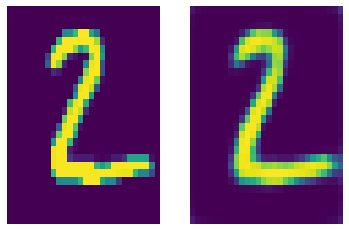

In [27]:
img_size = 28
plt.subplot(1,2,1)
plt.imshow(x_test[1].reshape(img_size,img_size),aspect='auto')
plt.axis('off')
plt.subplot(1,2,2)
plt.imshow(decoded_imgs[1].reshape(img_size,img_size),aspect='auto')
plt.axis('off')